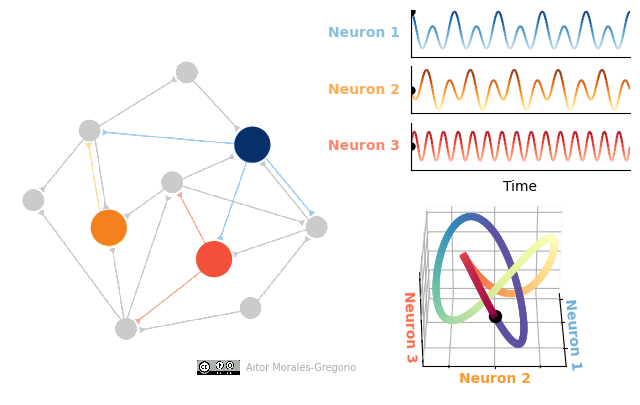

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.collections import LineCollection
from PIL import Image
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

def trefoil(x):
    """
    Cartesian representation of a trefoil knot
    """
    y1 = np.cos(x) + 2*np.cos(2*x)
    y2 = np.sin(x) - 2*np.sin(2*x)
    y3 = 2*np.sin(3*x)
    return y1, y2, y3

# Colormap
norm = plt.Normalize(0, 5)
alpha_norm = plt.Normalize(-4, 3)
cmap = plt.cm.Spectral

# Plot layout as mosaic
fig, axs = plt.subplot_mosaic("""
                                AAAAAA.BBBB
                                AAAAAA.CCCC
                                AAAAAA.DDDD
                                AAAAAAEEEEE
                                AAAAAAEEEEE
                                AAAAAAEEEEE
                                AAAAAAEEEEE
                                """, figsize=(8,5), facecolor='w')


'''
Sample graph with color patches
'''
# Show experimental diagram
img = Image.open('support_imgs/sample_graph.png')
axs['A'].imshow(np.asanyarray(img), interpolation='nearest')
axs['A'].axis('off')

# Initialize patches for the graph (these will be animated later)
neurons = axs['A'].scatter([531, 216, 447], 
                           [211, 393, 462], 
                           s=2700, lw=0, marker='.', alpha=1, 
                           c=[plt.cm.Blues(0.5), 
                           plt.cm.YlOrBr(0.5), 
                           plt.cm.Reds(0.5)])

''' 
Time series plots
'''
# Trefoil knot (long time, low resolution)
x = np.arange(0, 10*np.pi, step=0.1)
y1, y2, y3 = trefoil(x)

# Define colors for the time series
color_N1 = plt.cm.Blues(alpha_norm(y1))
color_N2 = plt.cm.YlOrBr(alpha_norm(y2))
color_N3 = plt.cm.Reds(alpha_norm(y3))

# Create time series plots as a line collection
for i, letter, sig, color, c in zip([1, 2, 3], ['B', 'C', 'D'], [y1, y2, y3], [color_N1, color_N2, color_N3], [plt.cm.Blues(0.5), plt.cm.YlOrBr(0.5), plt.cm.Reds(0.5)]):
    ax = axs[letter]                      
    ax.set_ylabel(f'Neuron {i}', c=c, alpha=0.8, rotation=0, ha='right', va='center', fontweight='bold')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    points = np.array([x, sig]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, colors=color)
    line = ax.add_collection(lc)
    ax.set_xlim(0, 10*np.pi)
    ax.set_ylim(-3.2, 3.2)

ax.set_xlabel('Time')
ax.set_zorder(100)

# Initialize tracking dot and line in time dependent plots (these will be animated later)
frame = 0
axs['B'].scatter(x[frame], y1[frame], s=100, c='k', marker='.', zorder=999)
axs['B'].axvline(x[frame], c='k', zorder=-99)
axs['C'].scatter(x[frame], y2[frame], s=100, c='k', marker='.', zorder=999)
axs['C'].axvline(x[frame], c='k', zorder=-99)
axs['D'].scatter(x[frame], y3[frame], s=100, c='k', marker='.', zorder=999)
axs['D'].axvline(x[frame], c='k', zorder=-99)

'''
3D plot
'''
# Create the axes with a 3d projection
axs['E']._subplotspec.num1 = axs['E']._subplotspec.num1
axs['E']._subplotspec.num2 = axs['E']._subplotspec.num2
ax = fig.add_subplot(axs['E']._subplotspec, projection='3d', 
                     computed_zorder=True)
axs['E'].remove()
axs['E'] = ax

# Remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Trefoil knot (single loop, high resolution)
x = np.arange(0, 2*np.pi, step=0.01)
y1, y2, y3 = trefoil(x)

# Create points and segments
points = np.array([y1, y2, y3]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
for i, seg in enumerate(segments):
    ax.plot(seg[:, 0], seg[:, 1], seg[:, 2], c=cmap(norm(x[i])), lw=5, alpha=0.5)

# Style of 3D plot
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Neuron 1', c=plt.cm.Blues(0.5), labelpad=-15, fontweight='bold')
ax.set_ylabel('Neuron 2', c=plt.cm.YlOrBr(0.5), labelpad=-15, fontweight='bold')
ax.set_zlabel('Neuron 3', c=plt.cm.Reds(0.5), labelpad=-15, fontweight='bold')

# Initialize tracking dot in 3D axes
axs['E'].scatter(y1[frame], y2[frame], y3[frame], s=300, c='k', marker='.', zorder=999)

'''
License
'''
# Insert the license and name to the figure
axin = fig.add_axes((0.35, 0.15, 0.07, 0.03))
img = Image.open('support_imgs/by-sa.png')
axin.imshow(np.asanyarray(img), interpolation='nearest')
axin.axis('off')
fig.text(0.42, 0.164, 'Aitor Morales-Gregorio', c='darkgray', fontsize=7,
         ha='left', va='center')

# Save a snapshot (helps to check layout is correct before running the animation)
plt.savefig('output/snapshot.png', dpi=300, bbox_inches='tight')

'''
Make animation with rotating manifolds for visualization
(Can take several minutes to animate)
'''
# Trefoil knot (long time, low resolution)
x = np.arange(0, 10*np.pi, step=0.1)
y1, y2, y3 = trefoil(x)

# Animate rotation
def update(frame):

    # Update colors of the patches in the sample graph
    neurons.set_facecolors([color_N1[frame], color_N2[frame], color_N3[frame]])

    # Update position of tracking dots and lines in time series
    axs['B'].__dict__['_children'][-1].remove()
    axs['B'].__dict__['_children'][-1].remove()
    axs['C'].__dict__['_children'][-1].remove()
    axs['C'].__dict__['_children'][-1].remove()
    axs['D'].__dict__['_children'][-1].remove()
    axs['D'].__dict__['_children'][-1].remove()
    axs['B'].scatter(x[frame], y1[frame], s=100, c='k', marker='.', zorder=999)
    axs['B'].axvline(x[frame], c='k', zorder=-99)
    axs['C'].scatter(x[frame], y2[frame], s=100, c='k', marker='.', zorder=999)
    axs['C'].axvline(x[frame], c='k', zorder=-99)
    axs['D'].scatter(x[frame], y3[frame], s=100, c='k', marker='.', zorder=999)
    axs['D'].axvline(x[frame], c='k', zorder=-99)

    # Rotate 3D axes
    axs['E'].view_init(azim=frame)

    # Update location of the 3D point
    axs['E'].__dict__['_children'][-1].remove()
    axs['E'].scatter(y1[frame], y2[frame], y3[frame], s=300, c='k', marker='.', zorder=999)
    pass

# Render and save animation
anim = FuncAnimation(fig, update, frames=np.arange(0, color_N1.shape[0]), interval=1000/20)
FFwriter = animation.FFMpegWriter(fps=20)
video_path = 'output/animation.mp4'
anim.save(video_path, writer=FFwriter, dpi=400)